In [1]:
import pandas as pd

df = pd.read_csv("census2021-ts011-ward.csv")

barnet_wards = [
    "Barnet Vale",
    "Brunswick Park",
    "Burnt Oak",
    "Childs Hill",
    "Colindale North",
    "Colindale South",
    "Cricklewood",
    "East Barnet",
    "East Finchley",
    "Edgware (Barnet)",
    "Edgwarebury",
    "Finchley Church End",
    "Friern Barnet",
    "Garden Suburb",
    "Golders Green",
    "Hendon (Barnet)",
    "High Barnet",
    "Mill Hill (Barnet)",
    "Totteridge & Woodside",
    "Underhill",
    "West Finchley",
    "West Hendon",
    "Whetstone",
    "Woodhouse (Barnet)"
]

df_barnet = df[df['geography'].isin(barnet_wards)]

df_barnet['geography'] = df_barnet['geography'].str.replace(' \(Barnet\)', '')

df_barnet = df_barnet.drop(columns=['date', 'geography code'])

df_barnet

<ipython-input-1-b366af2d3900>:34: FutureWarning: The default value of regex will change from True to False in a future version.
  df_barnet['geography'] = df_barnet['geography'].str.replace(' \(Barnet\)', '')
<ipython-input-1-b366af2d3900>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barnet['geography'] = df_barnet['geography'].str.replace(' \(Barnet\)', '')


,geography,Household deprivation: Total: All households,Household deprivation: Household is not deprived in any dimension,Household deprivation: Household is deprived in one dimension,Household deprivation: Household is deprived in two dimensions,Household deprivation: Household is deprived in three dimensions,Household deprivation: Household is deprived in four dimensions
6107,Barnet Vale,7095,3717,2284,863,203,28
6108,Brunswick Park,5991,3091,1984,751,158,7
6109,Burnt Oak,7397,2553,2877,1456,481,30
6110,Childs Hill,7975,3935,2612,1019,327,82
6111,Colindale North,4475,1724,1621,809,288,33
6112,Colindale South,7468,3757,2403,968,297,43
6113,Cricklewood,3966,1565,1454,674,236,37
6114,East Barnet,6991,3610,2178,942,236,25
6115,East Finchley,6900,3385,2337,907,256,15
6116,Edgware,7212,3715,2364,942,163,28


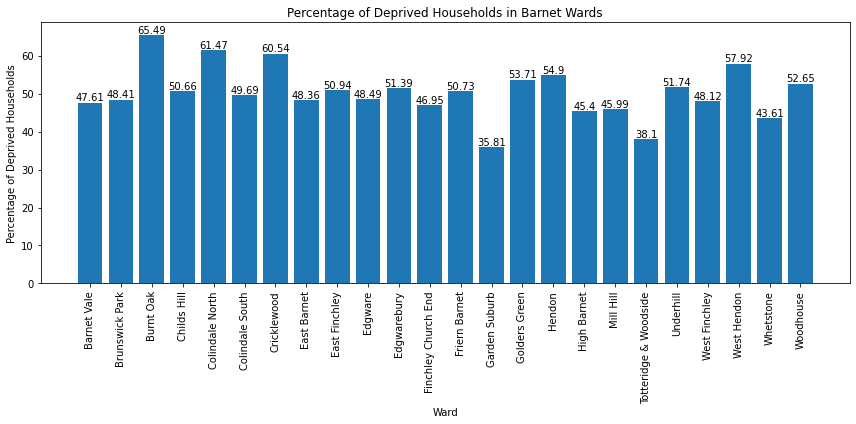

In [2]:
import matplotlib.pyplot as plt

df_barnet['Percentage Deprived'] = (df_barnet['Household deprivation: Household is deprived in one dimension'] +
                                    df_barnet['Household deprivation: Household is deprived in two dimensions'] +
                                    df_barnet['Household deprivation: Household is deprived in three dimensions'] +
                                    df_barnet['Household deprivation: Household is deprived in four dimensions']) / df_barnet['Household deprivation: Total: All households'] * 100

# Create the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(df_barnet['geography'], df_barnet['Percentage Deprived'])
plt.xticks(rotation=90)
plt.xlabel('Ward')
plt.ylabel('Percentage of Deprived Households')
plt.title('Percentage of Deprived Households in Barnet Wards')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.savefig('bar_graph.png', dpi=300, facecolor='white')

plt.show()

In [3]:
df_unemployment = pd.read_csv("census2021-ts065-ward.csv")

df_unemployment_barnet = df_unemployment[df_unemployment['geography'].isin(barnet_wards)]

df_unemployment_barnet['geography'] = df_unemployment_barnet['geography'].str.replace(' \(Barnet\)', '')

df_unemployment_barnet = df_unemployment_barnet.drop(columns=['date', 'geography code', 
                                    "Employment history: Not in employment: Worked in the last 12 months", 
                                    "Employment history: Not in employment: Not worked in the last 12 months",
                                    "Employment history: Total: All usual residents aged 16 years and over not in employment the week before the census"])

df_unemployment_barnet.head()

<ipython-input-3-86537e345f2f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_unemployment_barnet['geography'] = df_unemployment_barnet['geography'].str.replace(' \(Barnet\)', '')
<ipython-input-3-86537e345f2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unemployment_barnet['geography'] = df_unemployment_barnet['geography'].str.replace(' \(Barnet\)', '')


,geography,Employment history: Not in employment: Never worked
6107,Barnet Vale,1432
6108,Brunswick Park,1642
6109,Burnt Oak,3015
6110,Childs Hill,2332
6111,Colindale North,1653


In [4]:
df_employment = pd.read_csv("census2021-ts063-ward.csv")

df_employment_barnet = df_employment[df_employment['geography'].isin(barnet_wards)]

df_employment_barnet['geography'] = df_employment_barnet['geography'].str.replace(' \(Barnet\)', '')

df_employment_barnet = df_employment_barnet.drop(columns=['date', 'geography code', 
                                    "Occupation (current): 1. Managers, directors and senior officials", 
                                    "Occupation (current): 2. Professional occupations", 
                                    "Occupation (current): 3. Associate professional and technical occupations",
                                    "Occupation (current): 3. Associate professional and technical occupations",
                                    "Occupation (current): 4. Administrative and secretarial occupations",
                                    "Occupation (current): 5. Skilled trades occupations",
                                    "Occupation (current): 6. Caring, leisure and other service occupations", 
                                    "Occupation (current): 7. Sales and customer service occupations", 
                                    "Occupation (current): 8. Process, plant and machine operatives",
                                    "Occupation (current): 9. Elementary occupations"])

df_employment_barnet.head()

<ipython-input-4-d957eb07037b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_employment_barnet['geography'] = df_employment_barnet['geography'].str.replace(' \(Barnet\)', '')
<ipython-input-4-d957eb07037b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employment_barnet['geography'] = df_employment_barnet['geography'].str.replace(' \(Barnet\)', '')


,geography,Occupation (current): Total: All usual residents aged 16 years and over in employment the week before the census
6107,Barnet Vale,8322
6108,Brunswick Park,7780
6109,Burnt Oak,9817
6110,Childs Hill,9462
6111,Colindale North,5442


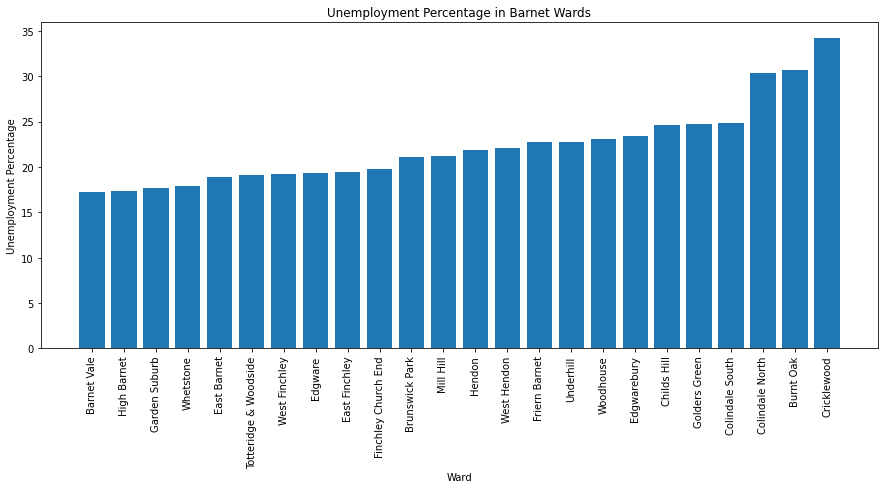

In [5]:
# Calculate unemployment percentage
df_unemployment_barnet['Unemployment Percentage'] = (df_unemployment_barnet["Employment history: Not in employment: Never worked"] / df_employment_barnet['Occupation (current): Total: All usual residents aged 16 years and over in employment the week before the census']) * 100

# Create a new DataFrame with ward names and unemployment percentage
df_unemployment_percentage = pd.DataFrame({'Ward Name': df_unemployment_barnet['geography'], 'Unemployment Percentage': df_unemployment_barnet['Unemployment Percentage']})

# Sort the DataFrame by unemployment percentage in ascending order
df_unemployment_percentage = df_unemployment_percentage.sort_values('Unemployment Percentage')

# Plot the bar graph
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(df_unemployment_percentage['Ward Name'], df_unemployment_percentage['Unemployment Percentage'])
ax.set_xlabel('Ward')
ax.set_ylabel('Unemployment Percentage')
ax.set_title('Unemployment Percentage in Barnet Wards')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [6]:
import geopandas as gpd

shapefile = "WD_DEC_2022_UK_BSC.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile)

gdf_barnet = gdf[gdf['LAD22NM'] == "Barnet"]

gdf_barnet

,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
6137,E05013628,Barnet Vale,NaN,E09000003,Barnet,525851,196154,-0.18229,51.6501,97bf05b9-9d8e-43a3-8fe8-a53101b7256b,"POLYGON ((526287.639 197330.160, 526920.508 19..."
6138,E05013629,Brunswick Park,NaN,E09000003,Barnet,528434,193714,-0.14587,51.6276,1a238f26-1494-4fd6-94a5-02e1b0f82806,"POLYGON ((528925.153 194719.273, 529579.999 19..."
6139,E05013630,Burnt Oak,NaN,E09000003,Barnet,520483,190897,-0.26165,51.6040,2311df99-ee6d-4955-b7cd-733c0bd39a28,"POLYGON ((521653.350 191396.890, 520941.120 19..."
6140,E05013631,Childs Hill,NaN,E09000003,Barnet,524959,186928,-0.19846,51.5674,602694ba-f1b8-4837-a3b4-505268381fe5,"POLYGON ((525135.437 187940.796, 526088.781 18..."
6141,E05013632,Colindale North,NaN,E09000003,Barnet,521597,190729,-0.24563,51.6023,c08ed667-6a1e-45dd-b82e-706517ce67c0,"POLYGON ((522095.180 190678.790, 522253.631 19..."
6142,E05013633,Colindale South,NaN,E09000003,Barnet,521560,189439,-0.24661,51.5907,48832027-4a4b-450d-ade0-6404b9bacaa8,"POLYGON ((522253.631 190045.193, 522135.100 18..."
6143,E05013634,Cricklewood,NaN,E09000003,Barnet,523539,187001,-0.21891,51.5684,683031a2-7d9a-4740-ac9f-f46e595dffe6,"POLYGON ((524091.250 187415.850, 524390.667 18..."
6144,E05013635,East Barnet,NaN,E09000003,Barnet,527474,195561,-0.15906,51.6444,55c56f71-8b86-482f-a544-7640bdf72e26,"POLYGON ((528648.496 195023.804, 527487.999 19..."
6145,E05013636,East Finchley,NaN,E09000003,Barnet,526811,190056,-0.17062,51.5951,85528b7e-f008-408a-875d-a27ef251f9bb,"POLYGON ((527774.857 191224.247, 527418.498 19..."
6146,E05013637,Edgware,NaN,E09000003,Barnet,519396,192180,-0.27690,51.6158,3efc62a0-b454-4798-b6b2-adfc47e83da7,"POLYGON ((517562.747 194408.129, 518621.810 19..."


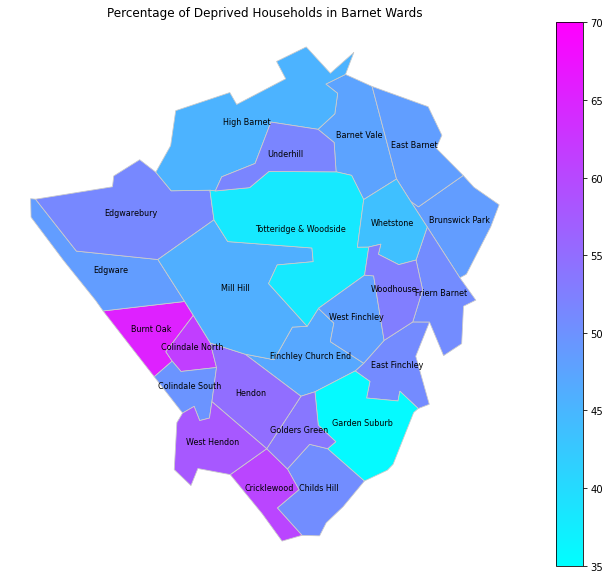

In [7]:
# Merge the data from the DataFrame to the GeoDataFrame based on ward names
gdf_merged = pd.merge(gdf_barnet, df_barnet, left_on='WD22NM', right_on='geography', how='left')

# Create the map visualization
fig, ax = plt.subplots(figsize=(12, 10))
gdf_merged.plot(column='Percentage Deprived', cmap='cool', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin = 35, vmax = 70)

for idx, row in gdf_barnet.iterrows():
    plt.annotate(text=row['WD22NM'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), fontsize=8, ha='center')

ax.set_title('Percentage of Deprived Households in Barnet Wards')
ax.set_axis_off()

plt.show()

In [8]:
gdf[gdf['WD22NM'] == "Mill Hill"]

,WD22CD,WD22NM,WD22NMW,LAD22CD,LAD22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
5416,E05012864,Mill Hill,NaN,E07000108,Dover,635938,151055,1.37663,51.2099,5b27b8eb-adf6-4fb6-bdba-d0f6d6923b43,"POLYGON ((635910.500 152138.900, 637197.100 15..."
6154,E05013645,Mill Hill,NaN,E09000003,Barnet,522782,191875,-0.22812,51.6123,61ca179f-489c-46bc-b33b-3c3127d0a976,"POLYGON ((524603.450 191113.600, 524221.520 19..."


In [9]:
df_population = pd.read_csv("census2021-ts006-ward.csv")

df_population_barnet = df_population[df_population['geography'].isin(barnet_wards)]

df_population_barnet['geography'] = df_population_barnet['geography'].str.replace(' \(Barnet\)', '')

df_population_barnet = df_population_barnet.drop(columns=['date', 'geography code'])

df_population_barnet.head()

<ipython-input-9-ed2092636eed>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_population_barnet['geography'] = df_population_barnet['geography'].str.replace(' \(Barnet\)', '')
<ipython-input-9-ed2092636eed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_barnet['geography'] = df_population_barnet['geography'].str.replace(' \(Barnet\)', '')


,geography,Population Density: Persons per square kilometre
6107,Barnet Vale,4795.7
6108,Brunswick Park,5348.6
6109,Burnt Oak,8602.4
6110,Childs Hill,6692.5
6111,Colindale North,11510.9


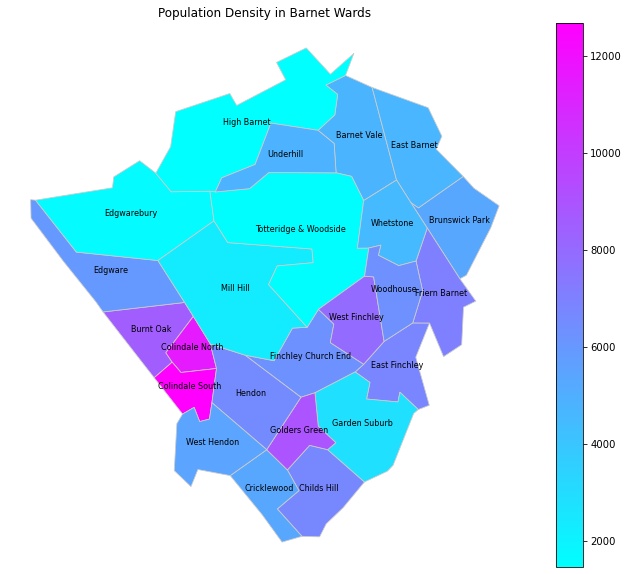

In [10]:
# Merge the data from the DataFrame to the GeoDataFrame based on ward names
gdf_merged_population = pd.merge(gdf_barnet, df_population_barnet, left_on='WD22NM', right_on='geography', how='left')

# Create the map visualization
fig, ax = plt.subplots(figsize=(12, 10))
gdf_merged_population.plot(column='Population Density: Persons per square kilometre', cmap='cool', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in gdf_barnet.iterrows():
    plt.annotate(text=row['WD22NM'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), fontsize=8, ha='center')

ax.set_title('Population Density in Barnet Wards')
ax.set_axis_off()

plt.show()

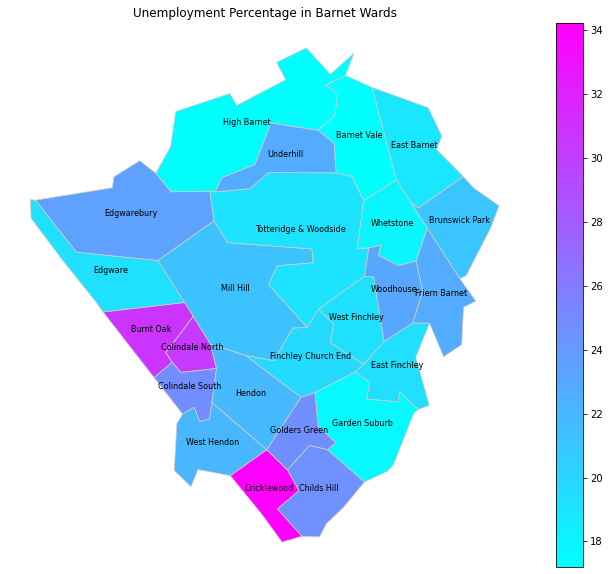

In [11]:
# Merge the data from the DataFrame to the GeoDataFrame based on ward names
gdf_merged_unemployment = pd.merge(gdf_barnet, df_unemployment_barnet, left_on='WD22NM', right_on='geography', how='left')

# Create the map visualization
fig, ax = plt.subplots(figsize=(12, 10))
gdf_merged_unemployment.plot(column='Unemployment Percentage', cmap='cool', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for idx, row in gdf_barnet.iterrows():
    plt.annotate(text=row['WD22NM'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), fontsize=8, ha='center')

ax.set_title('Unemployment Percentage in Barnet Wards')
ax.set_axis_off()

plt.show()

In [12]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("socio-economic factors.db")

# Save each DataFrame to a table in the database
df_barnet.to_sql("df_barnet", conn)
df_unemployment_barnet.to_sql("df_unemployment_barnet", conn)
df_employment_barnet.to_sql("df_employment_barnet", conn)
df_population_barnet.to_sql("df_population_density_barnet", conn)

# Commit the changes and close the connection
conn.commit()
conn.close()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(
